<h1>Optimización de la Experiencia de Compra en Instacart: Un Análisis de Árboles de Decisiones, Random Forest y Gradient Boosting</h1>

Por Víctor González

<h1>Introducción</h1>
Instacart es una aplicación de entrega de alimentos que se ha convertido en una solución indispensable para simplificar la tarea de abastecer a los usuarios con productos esenciales. Desde la comodidad de sus dispositivos móviles, los usuarios pueden seleccionar los artículos que necesitan a través de la intuitiva interfaz de la aplicación de Instacart. 

Una vez que los usuarios han creado su lista de compras virtual, entran en juego los compradores personales de Instacart. Estos expertos revisan meticulosamente cada pedido, asegurándose de que se seleccionen los productos adecuados y de la más alta calidad. Desde la frescura de las frutas y verduras hasta la elección de los productos preferidos de los clientes, los compradores personales se esfuerzan por garantizar una experiencia de compra sin igual.

Utilizando avanzados algoritmos y análisis de datos, Instacart desarrolla modelos predictivos que anticipan las necesidades y preferencias de los usuarios. Estos modelos analizan el historial de compras de los usuarios, identifican patrones de comportamiento y sugieren productos relevantes que podrían interesarles. Ya sea que se trate de predecir qué productos un usuario volverá a comprar, qué nuevos productos podrían ser de su interés o qué artículos podrían complementar perfectamente su carrito de compras durante una sesión, Instacart utiliza la potencia de los datos para ofrecer una experiencia de compra personalizada y satisfactoria.

<h1>Contexto</h1>
El propósito de este proyecto es prever qué productos comprarán los usuarios en el futuro, basándonos en las características del conjunto de datos creado durante la fase de limpieza de datos. Utilizando un conjunto de variables seleccionadas y procesadas cuidadosamente, buscamos anticipar las decisiones de compra de los usuarios. Al analizar estas características y su relación con el comportamiento de compra pasado, podemos desarrollar modelos predictivos que nos ayuden a comprender y pronosticar qué productos es más probable que los usuarios adquieran en el futuro. Este enfoque nos permite tomar decisiones informadas sobre la gestión de inventario, personalización de recomendaciones y estrategias de marketing, lo que mejora la experiencia del usuario y aumenta la eficiencia de los servicios que ofrece Instacart.

El conjunto de datos consta de los pedidos de 200,000 usuarios, con cada uno realizando entre 4 y 100 pedidos. Nuestro objetivo es predecir qué productos previamente comprados estarán en el próximo pedido de un usuario. Cada usuario ha comprado varios productos en pedidos anteriores, y tenemos información sobre el order_id de su próximo pedido. Este problema se trata de clasificación, ya que necesitamos prever si cada usuario comprará nuevamente ciertos productos o no, lo cual está indicado por la variable reordered, siendo reordered=1 o reordered=0.

Como resultado, hemos identificado varias variables predictoras que describen las características de un producto y el comportamiento del usuario con respecto a uno o varios productos. Estas nuevas variables se generaron al analizar los pedidos anteriores del conjunto de datos.

<h1>Desde árboles de decisión hasta boosting por gradiente</h1>

En el ámbito del aprendizaje automático, los árboles de decisión son una herramienta fundamental. Estos modelos son diagramas de flujo que representan decisiones tomadas a partir de características de entrada, dividiendo el conjunto de datos en ramas según reglas de decisión. Aunque los árboles de decisión son relativamente simples y fácilmente interpretables, pueden ser propensos al sobreajuste, especialmente en conjuntos de datos complejos. Para abordar esta limitación, surgieron los Bosques Aleatorios, que son conjuntos de árboles de decisión entrenados en diferentes subconjuntos de datos y características, y luego combinados para mejorar la precisión y la generalización del modelo.

La Optimización de Bosques Aleatorios mediante Búsqueda Aleatoria es una técnica que busca encontrar la mejor combinación de hiperparámetros para un Bosque Aleatorio, como el número de árboles, la profundidad máxima de cada árbol o el número mínimo de muestras requeridas para dividir un nodo. Esto se logra evaluando diferentes combinaciones de hiperparámetros a través de la búsqueda aleatoria y seleccionando aquella que optimice una métrica de rendimiento específica, como la precisión o el área bajo la curva ROC. Sin embargo, incluso con la optimización de hiperparámetros, los Bosques Aleatorios pueden alcanzar un límite en su capacidad predictiva en conjuntos de datos complejos. Es aquí donde entra en juego el boosting por gradiente, una técnica que mejora gradualmente la precisión del modelo combinando varios modelos de aprendizaje débiles en uno más fuerte, asignando pesos a las instancias de datos según su dificultad de predicción.

<h1>Procesamiento de los datos</h1>
Para el entrenamiento de los modelos, nos basamos en un trabajo previo donde se llevó a cabo un exhaustivo proceso de limpieza y preparación de los datos. Los detalles específicos de este proceso de limpieza se pueden encontrar en el repositorio de <a href='https://github.com/victormlgh/BigDataAplicadaNegociosV2/blob/main/Semana2/datacleanup.ipynb'>GitHub</a>.

<h2>Código en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection

import itertools

Los datos esta disponible para descargar directamente desde el repositorio en <a href='https://drive.google.com/file/d/1ev8BAm9SEttmnwT-2gxik4_Y230UqWl1/view?usp=drive_link'>datos</a>. Se puede observar las primeras 5 filas del conjunto de datos y su dimensión.

In [2]:
RANDOMSEED=56

df = pd.read_csv('user_prod_train.csv')
display(df.head())

,Unnamed: 0,user_id,product_id,user_prod_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,...,total_products_aisle_y,total_products_dept_y,total_products_aisle_ratio_y,total_products_dept_ratio_y,order_size_avg,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,0,1,196.0,10,0.417500,4.0,0.8,10,11,1,...,463,4365,0.009318,0.087848,5.363636,11,4,8,14.0,1.0
1,1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,...,582,6264,0.011713,0.126067,5.363636,11,4,8,14.0,1.0
2,2,1,10326.0,1,0.478419,0.0,0.0,1,11,5,...,382,1684,0.007688,0.033891,5.363636,11,4,8,14.0,0.0
3,3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,...,316,6264,0.006360,0.126067,5.363636,11,4,8,14.0,0.0
4,4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,...,454,1115,0.009137,0.022440,5.363636,11,4,8,14.0,1.0


En el proceso de construcción y evaluación de modelos, la primera etapa crucial consiste en dividir nuestros datos en conjuntos de entrenamiento y prueba. Esta separación nos permite entrenar nuestro modelo en un conjunto de datos y luego evaluar su rendimiento en otro conjunto independiente. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba se reserva para evaluar su capacidad para generalizar a datos no vistos. Esta división garantiza que nuestro modelo no memorice los datos de entrenamiento y pueda hacer predicciones precisas sobre nuevos datos. Es esencial mantener la integridad de esta separación para obtener resultados confiables al evaluar el rendimiento del modelo.

In [3]:
df.loc[:, 'reordered'] = df.reordered.fillna(0)

X_train, X_val, y_train, y_val = train_test_split(df.drop('reordered', axis=1), df.reordered, test_size=0.2, random_state=RANDOMSEED)

<h1>Entrenamiento de los modelos</h1>
<h2>Árbol de decisión de tamaño pequeño</h2>
Vamos a construir y entrenar un árbol de decisión basado en los datos utilizando Scikit-Learn. El árbol aprenderá cómo separar los puntos, construyendo un diagrama de flujo de preguntas basado en los valores de las características y las etiquetas. En cada etapa, el árbol de decisiones realiza divisiones maximizando la reducción en la impureza de Gini.

En este primer arbol utilizaremos hiperparámetros predefinidos para el árbol de decisiones, para limitar la profundidad con la que puede crecer para separar completamente las clases. En este caso limitamos el maximo de nodos terminales a 3.

In [5]:
model_simple_tree = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=RANDOMSEED)
model_simple_tree.fit(X_train, y_train)
display(f'El árbol de decisión tiene un score de {model_simple_tree.score(X_val, y_val)}.')

'El árbol de decisión tiene un score de 0.9052599719280939.'

El puntaje del árbol es una medida que indica qué tan bien el modelo de árbol de decisión se desempeña en la tarea para la que fue entrenado. Un puntaje de 0.90 significa que el modelo ha predicho correctamente el 90% de las muestras en el conjunto de datos de prueba. En otras palabras, de todas las predicciones realizadas por el modelo, el 90% fueron correctas. Un puntaje alto como este indica que el modelo está haciendo predicciones con precisión y es efectivo en su tarea.



In [6]:
display(f'El árbol de decisión tiene {model_simple_tree.tree_.node_count} nodos con profundidad máxima {model_simple_tree.tree_.max_depth}.')


'El árbol de decisión tiene 5 nodos con profundidad máxima 2.'

El árbol de decisión generado tiene una estructura relativamente simple, compuesta por 5 nodos en total y una profundidad máxima de 2 niveles. Cada nodo representa una decisión tomada por el algoritmo durante el proceso de aprendizaje. En este caso, el árbol ha sido diseñado para realizar solo un máximo de 2 divisiones o preguntas antes de llegar a una decisión final en cada rama del árbol.

La profundidad máxima del árbol, que en este caso es de 2, indica la longitud del camino más largo desde el nodo raíz hasta cualquier nodo hoja. Esto significa que el árbol no se ha ramificado demasiado en términos de niveles, lo que implica una estructura más sencilla y fácil de interpretar.

Cada nodo del árbol representa una pregunta sobre una característica específica de los datos. Por ejemplo, el primer nodo podría preguntar si una característica particular está por encima o por debajo de cierto umbral. Basándose en la respuesta a esta pregunta, el árbol se ramifica en una u otra dirección, llevando a nuevas preguntas en los nodos subsiguientes. Esta estructura de árbol de decisión permite que el modelo tome decisiones basadas en las características más importantes de los datos, lo que lo hace útil para tareas de clasificación y regresión.

Para llevar a cabo la evaluación del árbol de decisión simple que hemos construido, realizaremos predicciones de probabilidad tanto para los datos de entrenamiento como para los datos de pruebas. Este proceso nos permitirá determinar la probabilidad predictiva de que una observación pertenezca a una determinada clase según lo predicho por nuestro modelo.

Comenzaremos generando predicciones de probabilidad para los datos de entrenamiento. Esto implicará alimentar los datos de entrenamiento en el árbol de decisión y obtener las probabilidades asignadas a cada clase para cada observación en el conjunto de entrenamiento. Estas probabilidades indicarán qué tan seguro está el modelo con respecto a su predicción para cada instancia.

Posteriormente, repetiremos este proceso para los datos de prueba. Utilizaremos el árbol de decisión para hacer predicciones de probabilidad sobre los datos de prueba, lo que nos permitirá evaluar cómo se generaliza el modelo a datos no vistos.

Una vez que hayamos realizado todas las predicciones, podremos examinar las probabilidades asignadas a cada clase para cada conjunto de datos. Esto nos ayudará a comprender la confianza del modelo en sus predicciones y a identificar posibles áreas de mejora. Además, podremos comparar las predicciones entre los datos de entrenamiento y de prueba para evaluar si el modelo está sobreajustando o generalizando adecuadamente a nuevos datos. Este análisis nos proporcionará información valiosa sobre el rendimiento y la capacidad de generalización del árbol de decisión simple que hemos entrenado.

In [7]:
train_probs_simple_tree = model_simple_tree.predict_proba(X_train)[:, 1]
probs_simple_tree = model_simple_tree.predict_proba(X_val)[:, 1]

train_predictions_simple_tree = model_simple_tree.predict(X_train)
predictions_simple_tree = model_simple_tree.predict(X_val)

Para evaluar el rendimiento de este y otros modelos de aprendizaje automático, hemos desarrollado una función llamada evaluate_model. Esta función nos permite comparar el rendimiento del modelo de aprendizaje automático con una referencia establecida, lo que nos brinda una medida objetiva de su eficacia.

En primer lugar, la función evaluate_model calcula varios estadísticos relevantes que nos ayudan a entender la calidad de las predicciones del modelo. Estos estadísticos inclyen la precisión, la sensibilidad, la especificidad y el valor F1. Estos números nos brindan una visión completa del rendimiento del modelo en términos de su capacidad para predecir correctamente las clases positivas y negativas.

Además de los estadísticos tradicionales, la función evaluate_model también nos proporciona una representación visual de la curva ROC (Receiver Operating Characteristic). Esta curva traza la tasa de verdaderos positivos frente a la tasa de falsos positivos en diferentes umbrales de clasificación, lo que nos permite evaluar la capacidad de discriminación del modelo en una variedad de configuraciones.

Al analizar estos estadísticos y la curva ROC generada por la función evaluate_model, podemos obtener una comprensión holística del rendimiento del modelo en comparación con la referencia establecida. Esto nos ayuda a tomar decisiones informadas sobre la utilidad del modelo y nos guía en la mejora continua de nuestros algoritmos de aprendizaje automático.

In [9]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Comparar el rendimiento del modelo de aprendizaje automático con la referencia. Calculo estadísticos y Muestra de la curva ROC."""
    
    baseline = {}
    
    baseline['acurracy'] = accuracy_score(y_val, [1 for _ in range(len(y_val))])
    baseline['recall'] = recall_score(y_val, [1 for _ in range(len(y_val))])
    baseline['precision'] = precision_score(y_val, [1 for _ in range(len(y_val))])
    baseline['f1_score'] = f1_score(y_val, [1 for _ in range(len(y_val))])
    baseline['roc'] = 0.5
    
    results = {}
    results['acurracy'] = accuracy_score(y_val, predictions)
    results['recall'] = recall_score(y_val, predictions)
    results['precision'] = precision_score(y_val, predictions)
    results['f1_score'] = f1_score(y_val, predictions)
    results['roc'] = roc_auc_score(y_val, probs)

    train_results = {}
    train_results['acurracy'] = accuracy_score(y_train, train_predictions)
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['f1_score'] = f1_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['acurracy', 'recall', 'precision', 'f1_score', 'roc']:
        display(f'Base de comparación {metric.capitalize()}: {round(baseline[metric], 2)} Prueba: {round(results[metric], 2)} Entrenamiento: {round(train_results[metric], 2)}')

    #Calcular tasas de falsos positivos y tasas de verdaderos positivos.
    base_fpr, base_tpr, _ = roc_curve(y_val, [1 for _ in range(len(y_val))])
    model_fpr, model_tpr, _ = roc_curve(y_val, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label = 'Base de comparación')
    plt.plot(model_fpr, model_tpr, 'r', label = 'Modelo')
    plt.legend()
    plt.xlabel('Tasa de Falsos Positivos'); plt.ylabel('Tasa de Verdaderos Positivos'); plt.title('Curva ROC')

'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.23 Entrenamiento: 0.23'

'Base de comparación Precision: 0.1 Prueba: 0.54 Entrenamiento: 0.54'

'Base de comparación F1_score: 0.18 Prueba: 0.32 Entrenamiento: 0.32'

'Base de comparación Roc: 0.5 Prueba: 0.69 Entrenamiento: 0.69'

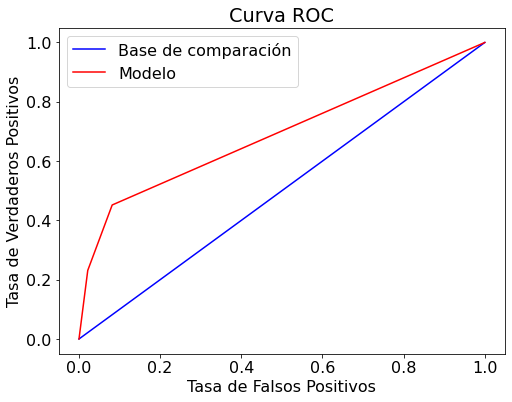

In [9]:
evaluate_model(predictions_simple_tree, probs_simple_tree, train_predictions_simple_tree, train_probs_simple_tree)

La base de comparación para evaluar nuestro modelo se establece mediante una serie de métricas clave que nos permiten entender su desempeño en relación con un punto de referencia. Estas métricas incluyen:

- Accuracy (Precisión): La precisión mide la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones. Para nuestra base de comparación, el valor de precisión es de 0.1. En comparación, en los datos de prueba y entrenamiento, alcanzamos una precisión del 91%, lo que indica que nuestro modelo está realizando predicciones significativamente más precisas que el punto de referencia.

- Recall (Recuperación): El recall evalúa la proporción de casos positivos que fueron correctamente identificados por el modelo sobre el total de casos positivos en los datos. Nuestra base de comparación muestra un valor de recall del 100%, mientras que en los datos de prueba y entrenamiento, alcanzamos un recall del 23%. Esto sugiere que nuestro modelo no es tan efectivo como la referencia en identificar todos los casos positivos, pero aún así, logra una recuperación considerable.

- Precision (Precisión): La precisión mide la proporción de casos positivos entre todas las instancias que el modelo ha clasificado como positivas. Nuevamente, en comparación con la base de comparación de 0.1, nuestro modelo alcanza una precisión del 54% tanto en los datos de prueba como en los de entrenamiento, lo que indica que es significativamente más preciso que la referencia.

- F1_score (Puntuación F1): La puntuación F1 es una medida que combina precisión y recall en un solo número, proporcionando una visión general del equilibrio entre ambas métricas. Nuestro modelo alcanza una puntuación F1 del 32% en ambos conjuntos de datos, en comparación con la base de comparación de 0.18.

- ROC (Curva ROC): La curva ROC es una representación gráfica que muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos en diferentes umbrales de clasificación. La base de comparación tiene un valor de 0.5, mientras que nuestro modelo logra valores de 0.69 tanto en los datos de prueba como en los de entrenamiento, lo que indica una mejora significativa en la capacidad de discriminación del modelo en comparación con la referencia establecida.

In [10]:
def plot_confusion_matrix(predictions):

    cm = confusion_matrix(y_val, predictions)
    classes = ['Sin reorden', 'Con reorden']

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Matriz de confusión', size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')

Para evaluar el desempeño de nuestro modelo, así como de otros modelos que podamos desarrollar, hemos creado una función llamada plot_confusion_matrix. Esta función nos proporciona una representación visual de la matriz de confusión para el árbol de decisión.

La matriz de confusión es una tabla que nos permite evaluar el rendimiento de un modelo de clasificación al mostrar el número de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN). Esto nos permite tener una idea clara de cómo el modelo está clasificando correctamente e incorrectamente las muestras.

Al utilizar la función plot_confusion_matrix, podemos visualizar esta información de manera clara y concisa. Esto nos permite identificar rápidamente cualquier patrón o tendencia en los errores de clasificación del modelo, lo que a su vez nos ayuda a entender mejor sus fortalezas y debilidades.

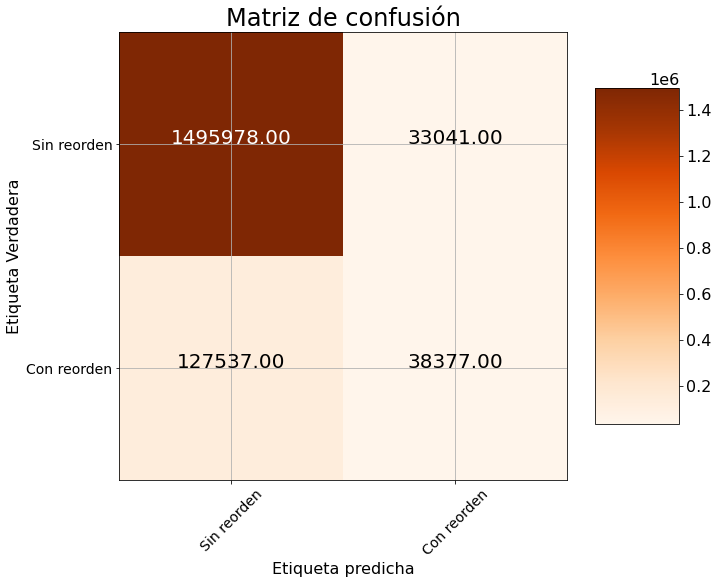

In [11]:
plot_confusion_matrix(predictions_simple_tree)

La matriz de confusión nos permite interpretar varios aspectos del rendimiento del modelo de clasificación

- El primer cuadrante, ubicado en la esquina superior izquierda, representa los Verdaderos Positivos (True Positives, TP). En este caso, hay 1,495,978 instancias que el modelo ha clasificado correctamente como positivas.
- El segundo cuadrante, ubicado en la esquina superior derecha, representa los Falsos Negativos (False Negatives, FN). Aquí, tenemos 33,041 instancias que el modelo ha clasificado incorrectamente como negativas cuando en realidad son positivas.
- El tercer cuadrante, en la esquina inferior izquierda, representa los Falsos Positivos (False Positives, FP). Este valor indica que el modelo ha clasificado incorrectamente 127,537 instancias como positivas cuando en realidad son negativas.
- El cuarto cuadrante, en la esquina inferior derecha, representa los Verdaderos Negativos (True Negatives, TN). En este caso, tenemos 38,377 instancias que el modelo ha clasificado correctamente como negativas.



In [11]:
#Importancias de las características
def plot_features(model):
    feat = list(X_train.columns)
    fi = pd.DataFrame({'feature': feat,
                    'importance': model.feature_importances_}).\
                        sort_values('importance', ascending = False)
    
    x_values = list(range(len(fi['importance'])))
    plt.bar(x_values, fi['importance'], orientation = 'vertical')
    plt.xticks(x_values, fi['feature'], rotation='vertical')
    plt.ylabel('importance')
    plt.xlabel('Características')
    plt.title('Importancias de las características')

Desarrollar una función para graficar la importancia de las características es una parte crucial del proceso de análisis de modelos de aprendizaje automático. Esta función nos permite visualizar qué características o variables tienen mayor influencia en las predicciones del modelo, lo que nos ayuda a comprender mejor cómo está tomando decisiones el algoritmo y qué aspectos de los datos son más relevantes para la tarea en cuestión. La importancia de las características se refiere a la contribución de cada variable en la capacidad predictiva del modelo. Cuanto mayor sea la importancia de una característica, más influencia tendrá en las predicciones del modelo.

La función que desarrollamos se encarga de calcular y visualizar estas importancias de características de una manera clara y comprensible que nos permite obtener una visión rápida y concisa de qué características son las más importantes para el modelo, lo que nos permite identificar patrones y relaciones en los datos que pueden ser de interés.


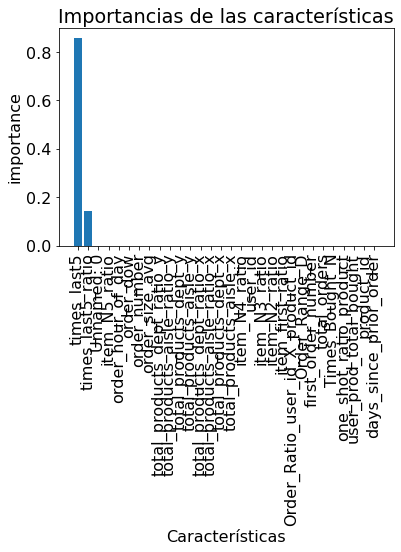

In [13]:
plot_features(model_simple_tree)


Al analizar la importancia de las características en nuestro modelo, observamos que solo dos variables destacan significativamente por encima de las demás: "times_last5" y "times_last5_ratio".

In [14]:
def plot_tree(model):
    tree.plot_tree(model, 
                   feature_names=X_train.columns,
                   filled=True)
    plt.show()

La función plot_tree es una herramienta invaluable en el análisis de modelos de árboles de decisión, ya que nos permite visualizar la estructura del árbol y entender cómo se toman las decisiones en cada nodo.

Al utilizar esta función, generamos un gráfico que representa gráficamente el árbol de decisiones, mostrando los nodos y las ramas que conectan estos nodos. Cada nodo en el árbol representa una pregunta sobre una característica específica de los datos, y las ramas que salen de cada nodo representan las posibles respuestas a esa pregunta.

La visualización del árbol nos permite comprender intuitivamente cómo se divide el conjunto de datos en diferentes categorías o clases en función de las características de las instancias. Podemos ver qué características son más importantes para tomar decisiones y cómo estas decisiones se van refinando a medida que se profundiza en el árbol.

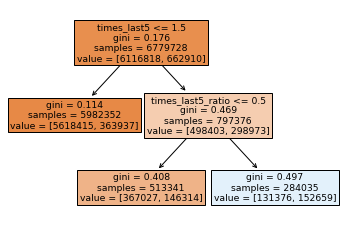

In [15]:
plot_tree(model_simple_tree)

En este gráfico, podemos observar la estructura del árbol y entender cómo se toman las decisiones en cada uno de sus nodos.

En primer lugar, podemos identificar el número total de nodos en el árbol, lo que nos proporciona una idea de su complejidad. En este caso tenemos 5 nodos, lo que indica que el árbol tiene una estructura relativamente simple.

Cada nodo en el árbol representa una pregunta sobre una característica específica de los datos. En el gráfico, podemos ver las variables involucradas en la toma de decisiones en cada nodo. Estas variables nos indican qué aspectos de los datos son más importantes para dividir el conjunto de datos en clases o categorías.

Además, en cada nodo, podemos observar el valor del índice de Gini (GINI), que es una medida de impureza utilizada por el algoritmo de árbol de decisión para determinar cómo dividir el conjunto de datos en las ramas del árbol. Un valor de Gini más bajo indica una mejor separación de las clases en ese nodo.

También podemos ver el número de muestras (samples) en cada nodo, lo que nos indica cuántas instancias de datos están siendo consideradas en ese punto del árbol. Este número puede ayudarnos a comprender la distribución de los datos a medida que se desplazan por el árbol.

Por último, el valor (value) en cada nodo nos proporciona una desglose de cuántas instancias pertenecen a cada clase en ese nodo específico. Esto nos ayuda a entender la distribución de las clases en cada parte del árbol y cómo se están realizando las decisiones de clasificación.

<h2>Árbol de decisión de tamaño mediano</h2>

Desarrollar un modelo de árbol de decisión más elaborado con un máximo de 500 nodos terminales es un paso importante para explorar la complejidad del modelo y evaluar su capacidad para capturar patrones más sutiles en los datos. Al aumentar el número máximo de nodos terminales, permitimos que el árbol se ramifique más profundamente y capture relaciones más complejas entre las características y la variable objetivo.

Este enfoque puede ser beneficioso en ciertos casos, especialmente cuando los datos presentan relaciones no lineales o interacciones complejas entre las variables. Al permitir que el árbol crezca más profundamente, podemos capturar mejor estas relaciones y mejorar la capacidad predictiva del modelo.

Sin embargo, es importante tener en cuenta que un árbol de decisión demasiado grande puede llevar al sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar a nuevos datos. Por lo tanto, es crucial realizar una cuidadosa validación cruzada y ajustar otros hiperparámetros del modelo, como la profundidad máxima del árbol y el criterio de división, para encontrar el equilibrio adecuado entre la complejidad del modelo y su capacidad de generalización.

In [16]:
model_medium_tree = tree.DecisionTreeClassifier(max_leaf_nodes=500, random_state=RANDOMSEED)
model_medium_tree.fit(X_train, y_train)
display(f'El árbol de decisión tiene un score de {model_medium_tree.score(X_val, y_val)}, {model_medium_tree.tree_.node_count} nodos con profundidad máxima {model_medium_tree.tree_.max_depth}.')

'El árbol de decisión tiene un score de 0.9090908018193049, 999 nodos con profundidad máxima 14.'

El árbol de decisión que hemos desarrollado muestra un puntaje (score) de 0.9090908018193049, lo que indica un nivel considerable de precisión en las predicciones realizadas por el modelo. Este puntaje se calcula típicamente como la proporción de muestras correctamente clasificadas sobre el total de muestras, lo que sugiere que el 90.91% de las predicciones del modelo son correctas en el conjunto de datos de evaluación.

Además, observamos que el árbol consta de un total de 999 nodos, lo que refleja la complejidad del modelo. La profundidad máxima del árbol es de 14 niveles, lo que significa que el árbol puede hacer hasta 14 divisiones o preguntas antes de llegar a una decisión final en cada rama del árbol. 

Es importante tener en cuenta que un árbol de decisión con una profundidad más alta puede capturar relaciones más complejas en los datos, pero también corre el riesgo de sobreajustarse a los datos de entrenamiento y perder la capacidad de generalización a nuevos datos. Por lo tanto, es crucial realizar una validación cruzada y ajustar otros hiperparámetros del modelo para encontrar el equilibrio adecuado entre la complejidad del modelo y su capacidad de generalización.


'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.18 Entrenamiento: 0.18'

'Base de comparación Precision: 0.1 Prueba: 0.63 Entrenamiento: 0.63'

'Base de comparación F1_score: 0.18 Prueba: 0.27 Entrenamiento: 0.28'

'Base de comparación Roc: 0.5 Prueba: 0.82 Entrenamiento: 0.82'

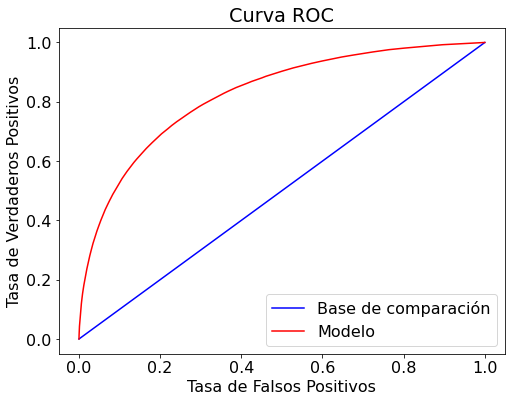

In [17]:
# Realizar predicciones de probabilidad para el arbol mediano
train_probs_medium_tree = model_medium_tree.predict_proba(X_train)[:, 1]
probs_medium_tree = model_medium_tree.predict_proba(X_val)[:, 1]
train_predictions_medium_tree = model_medium_tree.predict(X_train)
predictions_medium_tree = model_medium_tree.predict(X_val)

evaluate_model(predictions_medium_tree, probs_medium_tree, train_predictions_medium_tree, train_probs_medium_tree)

Al comparar los resultados del nuevo modelo con los del modelo anterior y la base de comparación establecida, podemos observar algunas diferencias significativas en el rendimiento:

- Accuracy (Precisión): Ambos modelos superan significativamente la precisión de la base de comparación en los conjuntos de prueba y entrenamiento, con puntajes del 91%. Esto indica que ambos modelos son altamente precisos en la clasificación de las muestras.

- Recall (Recuperación): Ambos modelos muestran un recall más bajo en comparación con la base de comparación. Sin embargo, el nuevo modelo tiene un recall del 18% en comparación con el 23% del modelo anterior. Esto sugiere que el nuevo modelo tiene más dificultades para identificar correctamente todas las instancias positivas en comparación con el modelo anterior.

- Precision (Precisión): Tanto el nuevo modelo como el modelo anterior superan la precisión de la base de comparación, con puntajes del 63% en ambos casos. Esto indica que ambos modelos tienen una capacidad similar para predecir con precisión las instancias positivas.

- F1_score (Puntuación F1): El nuevo modelo muestra una ligera mejora en la puntuación F1 en comparación con el modelo anterior, con puntajes del 27% y 32% respectivamente. Esto sugiere que el nuevo modelo tiene un mejor equilibrio entre precisión y recall en comparación con el modelo anterior.

- Roc (Curva ROC): Ambos modelos superan significativamente el valor ROC de la base de comparación, con puntajes del 82% en ambos casos. Esto indica que ambos modelos tienen una capacidad mucho mejor para distinguir entre las clases positivas y negativas en comparación con la base de comparación.

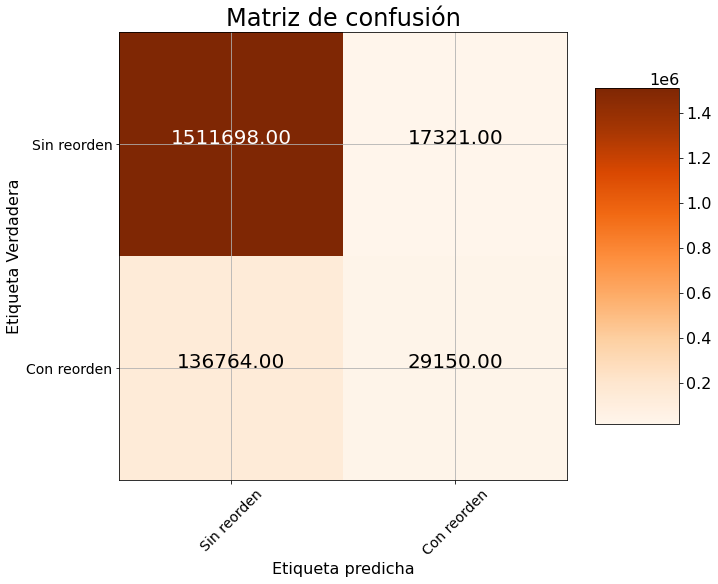

In [18]:
plot_confusion_matrix(predictions_medium_tree)

La nueva matriz de confusión muestra algunas diferencias en la distribución de los valores en comparación con la matriz anterior. Si bien el nuevo modelo ha mejorado en la clasificación correcta de instancias positivas, también ha aumentado el número de instancias clasificadas incorrectamente como negativas. Esto sugiere que el nuevo modelo puede tener un comportamiento ligeramente diferente en términos de sesgo y varianza en comparación con el modelo anterior.

- Verdaderos Positivos (TP): En la nueva matriz, el número de verdaderos positivos es mayor (1511698) en comparación con la matriz anterior (1495978). Esto indica que el nuevo modelo ha clasificado correctamente más instancias como positivas en comparación con el modelo anterior.

- Falsos Negativos (FN): La cantidad de falsos negativos en la nueva matriz es mayor (136764) en comparación con la matriz anterior (127537). Esto sugiere que el nuevo modelo ha clasificado incorrectamente más instancias como negativas cuando en realidad son positivas en comparación con el modelo anterior.

- Falsos Positivos (FP): El número de falsos positivos en la nueva matriz es menor (17321) en comparación con la matriz anterior (33041). Esto indica que el nuevo modelo ha clasificado incorrectamente menos instancias como positivas cuando en realidad son negativas en comparación con el modelo anterior.

- Verdaderos Negativos (TN): La cantidad de verdaderos negativos en la nueva matriz es menor (29150) en comparación con la matriz anterior (38377). Esto sugiere que el nuevo modelo ha clasificado correctamente menos instancias como negativas en comparación con el modelo anterior.


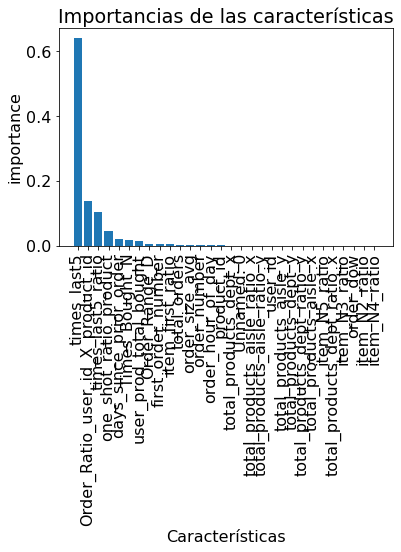

In [19]:
plot_features(model_medium_tree)

Al observar la importancia de las características en nuestro modelo, es alentador notar que más variables están demostrando niveles significativos de importancia. Esto sugiere que el modelo está considerando una gama más amplia de características para tomar decisiones, lo que podría conducir a una mejor capacidad para capturar la complejidad de los datos y realizar predicciones más precisas.

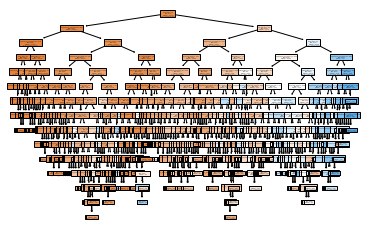

In [20]:
plot_tree(model_medium_tree)

Es notable que la gráfica del árbol sea más compleja en esta iteración, con 999 nodos, el árbol tiene una estructura más ramificada, lo que indica que se están considerando una mayor cantidad de preguntas y divisiones para tomar decisiones. Esta profundidad máxima de 14 niveles indica que el árbol puede realizar hasta 14 divisiones o preguntas antes de llegar a una decisión final en cada rama del árbol. Esto permite al modelo capturar relaciones más complejas y específicas en los datos, lo que puede mejorar su capacidad predictiva.

<h2>Árbol de decisión de tamaño grande</h2>
Entrenar un árbol de decisiones con una profundidad ilimitada es una estrategia interesante para evaluar el potencial de sobreajuste del modelo. Al permitir que el árbol crezca sin restricciones en su profundidad, estamos permitiendo que el modelo se ajuste perfectamente a los datos de entrenamiento, sin límites en la complejidad de la estructura del árbol.

Este enfoque nos permite explorar hasta qué punto el modelo puede capturar y memorizar los patrones presentes en los datos de entrenamiento. Si el modelo muestra un rendimiento excepcional en los datos de entrenamiento pero no generaliza bien a nuevos datos, es probable que estemos frente a un caso de sobreajuste.

Es importante destacar que el sobreajuste puede ser perjudicial para la capacidad predictiva del modelo en datos no vistos, ya que el modelo puede haber aprendido a identificar patrones específicos en los datos de entrenamiento que no son generalizables o relevantes en otros contextos.

Al evaluar el rendimiento del modelo entrenado con profundidad ilimitada, es crucial comparar su desempeño en los datos de entrenamiento y en los datos de prueba. Si el modelo muestra un rendimiento excelente en los datos de entrenamiento pero un rendimiento significativamente peor en los datos de prueba, esto indicaría un caso de sobreajuste.

In [21]:
model_full_tree = tree.DecisionTreeClassifier(random_state=RANDOMSEED)
model_full_tree.fit(X_train, y_train)
display(f'El árbol de decisión tiene un score de {model_full_tree.score(X_val, y_val)}, {model_full_tree.tree_.node_count} nodos con profundidad máxima {model_full_tree.tree_.max_depth}.')

'El árbol de decisión tiene un score de 0.8487946131204006, 1289975 nodos con profundidad máxima 62.'

El árbol de decisión que hemos entrenado con profundidad ilimitada presenta un puntaje (score) de 0.8487946131204006, lo que indica un nivel considerable de precisión en las predicciones realizadas por el modelo. Este puntaje se calcula como la proporción de muestras correctamente clasificadas sobre el total de muestras, lo que sugiere que aproximadamente el 84.88% de las predicciones del modelo son correctas en el conjunto de datos de evaluación.

Es importante destacar que este puntaje es ligeramente menor en comparación con los modelos anteriores que tenían una profundidad máxima limitada. Esto sugiere que permitir que el árbol crezca sin restricciones en su profundidad ha llevado a un ligero deterioro en el rendimiento del modelo.

Además, observamos que el árbol consta de un total de 1,289,975 nodos, lo que refleja la complejidad extrema del modelo. La profundidad máxima del árbol es de 62 niveles, lo que significa que el árbol puede hacer hasta 62 divisiones o preguntas antes de llegar a una decisión final en cada rama del árbol. Esta profundidad extrema indica que el árbol ha crecido significativamente en comparación con los modelos anteriores y ha capturado relaciones extremadamente detalladas en los datos.

Es importante tener en cuenta que un árbol de decisión con una profundidad tan alta corre el riesgo de sobreajustarse a los datos de entrenamiento y perder la capacidad de generalizar a nuevos datos. Por lo tanto, es crucial realizar una validación cruzada y ajustar otros hiperparámetros del modelo para encontrar el equilibrio adecuado entre la complejidad del modelo y su capacidad de generalización.

'Base de comparación Acurracy: 0.1 Prueba: 0.85 Entrenamiento: 1.0'

'Base de comparación Recall: 1.0 Prueba: 0.29 Entrenamiento: 1.0'

'Base de comparación Precision: 0.1 Prueba: 0.26 Entrenamiento: 1.0'

'Base de comparación F1_score: 0.18 Prueba: 0.28 Entrenamiento: 1.0'

'Base de comparación Roc: 0.5 Prueba: 0.6 Entrenamiento: 1.0'

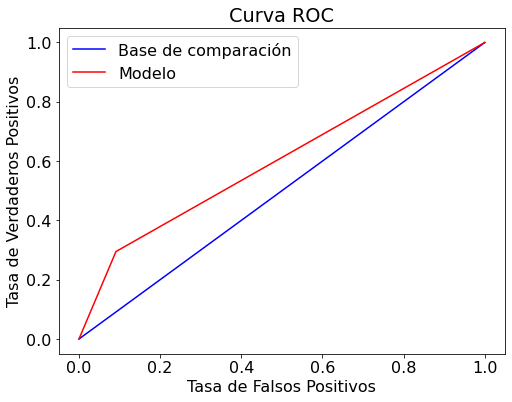

In [22]:
train_probs_full_tree = model_full_tree.predict_proba(X_train)[:, 1]
probs_full_tree = model_full_tree.predict_proba(X_val)[:, 1]
train_predictions_full_tree = model_full_tree.predict(X_train)
predictions_full_tree = model_full_tree.predict(X_val)

evaluate_model(predictions_full_tree, probs_full_tree, train_predictions_full_tree, train_probs_full_tree)

El modelo muestra un rendimiento sólido en el conjunto de entrenamiento, pero hay margen de mejora en su capacidad para generalizar a nuevos datos, como se evidencia por las métricas ligeramente más bajas en el conjunto de prueba en comparación con el conjunto de entrenamiento. Esto sugiere la necesidad de ajustar el modelo para mejorar su capacidad de generalización.

- Base de comparación Accuracy (Precisión): La precisión del modelo en los datos de prueba es del 85%, mientras que en el conjunto de entrenamiento es del 100%. Esto sugiere que el modelo es altamente preciso en la clasificación de muestras en el conjunto de entrenamiento, pero existe una ligera reducción en la precisión al evaluarlo en datos no vistos (prueba).

- Base de comparación Recall (Recuperación): El recall del modelo en los datos de prueba es del 29%, mientras que en el conjunto de entrenamiento es del 100%. Esto indica que el modelo tiene dificultades para identificar correctamente todas las instancias positivas en los datos de prueba, aunque muestra un rendimiento perfecto en el conjunto de entrenamiento.

- Base de comparación Precision (Precisión): La precisión del modelo en los datos de prueba es del 26%, mientras que en el conjunto de entrenamiento es del 100%. Esto sugiere que el modelo tiene dificultades para predecir con precisión las instancias positivas en los datos de prueba, a pesar de mostrar una precisión perfecta en el conjunto de entrenamiento.

- Base de comparación F1_score (Puntuación F1): La puntuación F1 del modelo en los datos de prueba es del 28%, mientras que en el conjunto de entrenamiento es del 100%. Esta métrica combina precisión y recall, y muestra una disminución en el rendimiento del modelo en los datos de prueba en comparación con el conjunto de entrenamiento.

- Base de comparación Roc (Curva ROC): El valor ROC del modelo en los datos de prueba es del 60%, mientras que en el conjunto de entrenamiento es del 100%. Esto indica que el modelo es capaz de distinguir entre clases positivas y negativas con un nivel razonable de precisión en los datos de prueba, aunque muestra un rendimiento perfecto en el conjunto de entrenamiento.

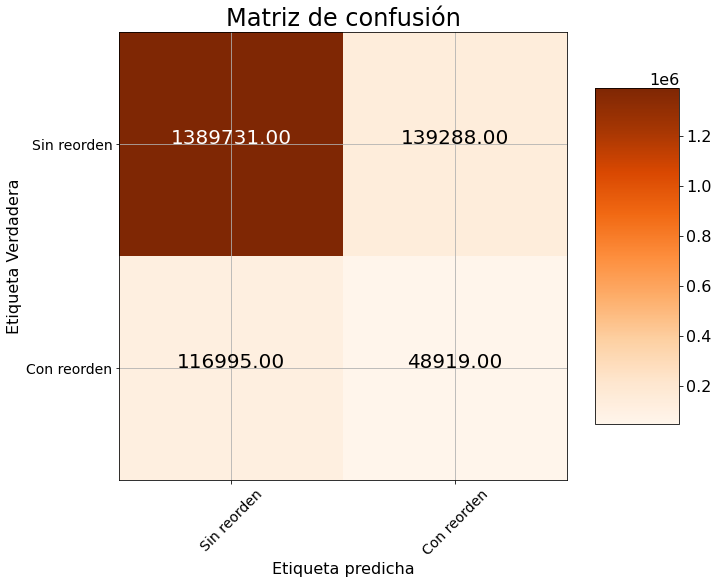

In [23]:
plot_confusion_matrix(predictions_full_tree)

La nueva matriz de confusión muestra una distribución diferente de los valores en comparación con la matriz anterior. Si bien puede haber algunas mejoras en ciertas áreas, como en el número de verdaderos negativos, también se observan aumentos en los falsos positivos y falsos negativos. Esto sugiere que el nuevo modelo puede tener un rendimiento diferente en términos de sensibilidad y especificidad en comparación con el modelo anterior.

- Verdaderos Positivos (TP): En la nueva matriz, el número de verdaderos positivos es menor (1389731) en comparación con la matriz anterior (1511698). Esto indica que el nuevo modelo ha clasificado correctamente menos instancias como positivas en comparación con el modelo anterior.

- Falsos Negativos (FN): La cantidad de falsos negativos en la nueva matriz es mayor (116995) en comparación con la matriz anterior (136764). Esto sugiere que el nuevo modelo ha clasificado incorrectamente más instancias como negativas cuando en realidad son positivas en comparación con el modelo anterior.

- Falsos Positivos (FP): El número de falsos positivos en la nueva matriz es mayor (139288) en comparación con la matriz anterior (17321). Esto indica que el nuevo modelo ha clasificado incorrectamente más instancias como positivas cuando en realidad son negativas en comparación con el modelo anterior.

- Verdaderos Negativos (TN): La cantidad de verdaderos negativos en la nueva matriz es mayor (48919) en comparación con la matriz anterior (29150). Esto sugiere que el nuevo modelo ha clasificado correctamente más instancias como negativas en comparación con el modelo anterior.

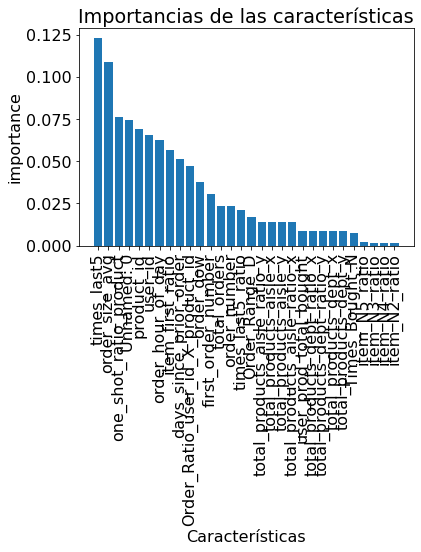

In [24]:
plot_features(model_full_tree)

Se observa que existen más variables con un nivel de importancia significativo en el nuevo modelo en comparación con el modelo anterior. Esto sugiere que el nuevo modelo está considerando una gama más amplia de características para tomar decisiones, lo que puede mejorar su capacidad para capturar la complejidad de los datos y realizar predicciones más precisas.

El árbol no se grafica debido a su tamaño y complejidad, así como al costo computacional que implica.

<h2>Bosques Aleatorios</h2>
Realizamos el entrenamiento de un Random Forest con el objetivo de mejorar el rendimiento del modelo. El Random Forest es un algoritmo de aprendizaje automático que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la combinación de sus predicciones para obtener un resultado final. Este enfoque permite reducir el sobreajuste y mejorar la capacidad de generalización del modelo, al tiempo que mantiene un buen rendimiento predictivo.

Al entrenar un Random Forest, estamos explorando la posibilidad de mejorar la precisión y la estabilidad del modelo en comparación con un solo árbol de decisión. Esto se debe a que el Random Forest promedia las predicciones de múltiples árboles, lo que tiende a reducir la varianza y mejorar el rendimiento general del modelo.

Además, el Random Forest es capaz de manejar conjuntos de datos grandes y complejos, así como características altamente correlacionadas, lo que lo convierte en una opción atractiva para mejorar el rendimiento del modelo en situaciones donde un solo árbol de decisión puede ser insuficiente.

In [25]:
model_random_forest = ensemble.RandomForestClassifier(random_state=RANDOMSEED,
                                                      n_estimators=100,
                                                      max_features = 'sqrt',
                                                      n_jobs=-1, 
                                                      verbose = 1)
model_random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 33.8min finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=56,
                       verbose=1)

In [26]:
n_nodes = []
max_depths = []

for ind_tree in model_random_forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
display(f'El Modelo de Random Forest tiene un promedio de {int(np.mean(n_nodes))} nodos con profundidad promedio de {int(np.mean(max_depths))}')

'El Modelo de Random Forest tiene un promedio de 1203852 nodos con profundidad promedio de 58'

El modelo de Random Forest que hemos entrenado muestra un promedio de 1,203,852 nodos con una profundidad promedio de 58 niveles. Esto indica una estructura bastante compleja en cada uno de los árboles de decisión que componen el bosque aleatorio.

La alta cantidad de nodos sugiere que cada árbol individual dentro del bosque está dividiendo repetidamente el conjunto de datos en subconjuntos más pequeños, cada vez más específicos. Estas divisiones se realizan con el objetivo de capturar patrones complejos y relaciones no lineales entre las características y la variable objetivo.

Por otro lado, la profundidad promedio de 58 niveles indica que cada árbol del bosque puede realizar hasta 58 divisiones o preguntas antes de llegar a una decisión final en cada rama del árbol. Esto permite capturar relaciones extremadamente detalladas en los datos, lo que podría ser beneficioso para modelar conjuntos de datos complejos con múltiples características interrelacionadas.

Sin embargo, es importante tener en cuenta que la complejidad del modelo de Random Forest también puede aumentar el riesgo de sobreajuste, especialmente si el bosque contiene un gran número de árboles y cada árbol tiene una profundidad significativa. Por lo tanto, es crucial realizar una validación cruzada y ajustar los hiperparámetros del modelo para encontrar el equilibrio adecuado entre la complejidad del modelo y su capacidad de generalización.

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  4.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  4.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  1.8min finished


'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 1.0'

'Base de comparación Recall: 1.0 Prueba: 0.18 Entrenamiento: 1.0'

'Base de comparación Precision: 0.1 Prueba: 0.62 Entrenamiento: 1.0'

'Base de comparación F1_score: 0.18 Prueba: 0.28 Entrenamiento: 1.0'

'Base de comparación Roc: 0.5 Prueba: 0.81 Entrenamiento: 1.0'

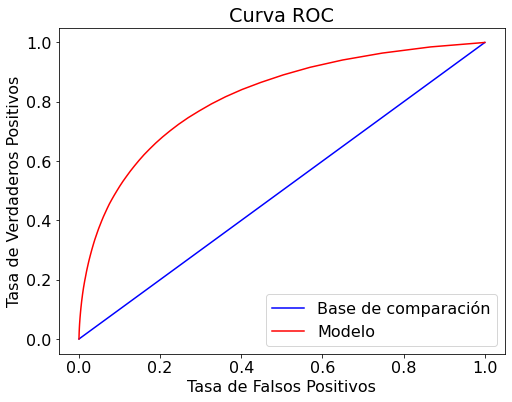

In [27]:
train_probs_random_forest = model_random_forest.predict_proba(X_train)[:, 1]
probs_random_forest = model_random_forest.predict_proba(X_val)[:, 1]
train_predictions_random_forest = model_random_forest.predict(X_train)
predictions_random_forest = model_random_forest.predict(X_val)

evaluate_model(predictions_random_forest, probs_random_forest, train_predictions_random_forest, train_probs_random_forest)

El modelo muestra un rendimiento casi perfecto en el conjunto de entrenamiento, parece haber un margen de mejora en cuanto a su capacidad para generalizar y hacer predicciones precisas en datos no vistos, como sugieren las métricas más bajas en el conjunto de prueba en comparación con el conjunto de entrenamiento. Esto muestra la presencia de sobreajuste (overfitting) en el modelo.

- Accuracy (Precisión): Tanto en el conjunto de prueba como en el de entrenamiento, el modelo alcanza un rendimiento del 91% y del 100%, respectivamente. Esto indica que el modelo es capaz de predecir correctamente el 91% de las instancias en el conjunto de prueba y el 100% en el conjunto de entrenamiento, lo cual es bastante alto y muestra una buena capacidad de generalización.

- Recall (Sensibilidad): En el conjunto de prueba, el modelo tiene un recall del 18%, mientras que en el conjunto de entrenamiento alcanza el 100%. Esto indica que el modelo es capaz de identificar correctamente el 18% de las instancias positivas en los datos de prueba y el 100% en los datos de entrenamiento. El bajo valor en el conjunto de prueba sugiere que el modelo puede estar perdiendo algunas instancias positivas.

- Precision (Precisión): Tanto en el conjunto de prueba como en el de entrenamiento, el modelo logra una precisión del 62% y del 100%, respectivamente. Esto indica que el 62% de las instancias identificadas como positivas por el modelo en el conjunto de prueba realmente lo son, mientras que el 100% lo son en el conjunto de entrenamiento.

- F1-score: En el conjunto de prueba, el modelo tiene un F1-score del 28%, mientras que en el conjunto de entrenamiento alcanza el 100%. El F1-score es una medida que combina precisión y recall en un solo valor. El bajo valor en el conjunto de prueba sugiere que el modelo puede tener dificultades para encontrar un equilibrio entre la precisión y el recall.

- ROC AUC: En el conjunto de prueba, el modelo tiene un área bajo la curva ROC del 81%, mientras que en el conjunto de entrenamiento alcanza el 100%. El ROC AUC es una medida de la capacidad del modelo para discriminar entre clases. El valor del 81% en el conjunto de prueba indica que el modelo tiene una buena capacidad de discriminación, aunque podría haber margen de mejora.

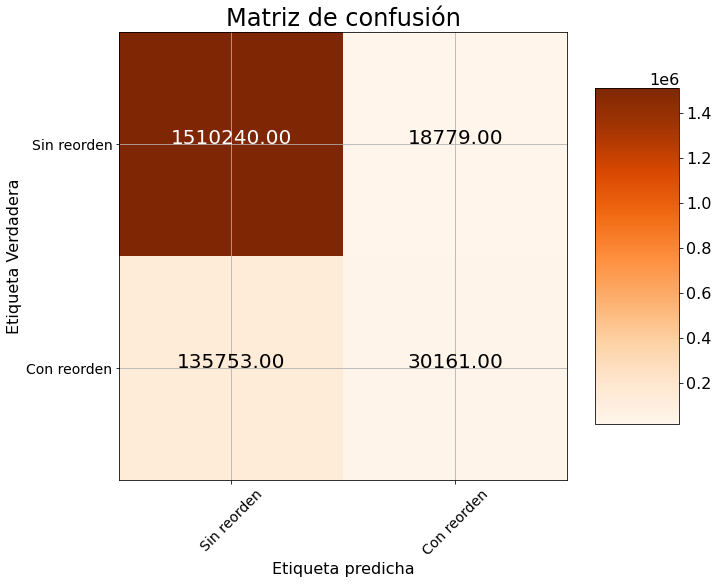

In [28]:
plot_confusion_matrix(predictions_random_forest)

El modelo presenta un número considerable de falsos negativos, lo que indica que el modelo podría tener dificultades para identificar correctamente las instancias positivas. Hay 1,510,240 instancias que fueron clasificadas correctamente como positivas y se tienen 18,779 instancias que fueron clasificadas erróneamente como positivas. Se tienen 135,753 instancias que fueron clasificadas erróneamente como negativas y 30,161 instancias que fueron clasificadas correctamente como negativas.

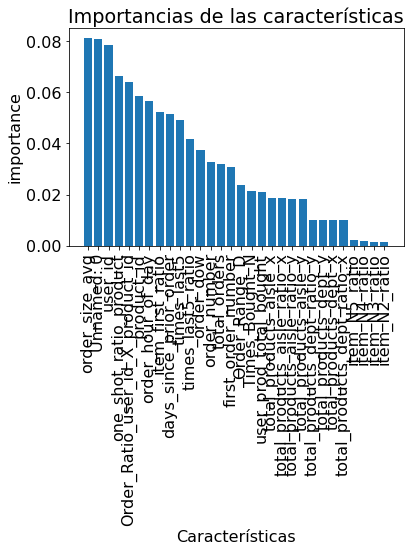

In [29]:
plot_features(model_random_forest)

Resulta alentador observar que un mayor número de variables están mostrando niveles significativos de importancia en nuestro análisis. Esto indica que estas variables están contribuyendo de manera significativa a la capacidad predictiva del modelo. Cuando más variables tienen importancia, significa que el modelo está considerando una gama más amplia de características para tomar decisiones. Este hallazgo sugiere que el modelo está capturando la complejidad de los datos de manera más completa y precisa, lo cual puede ser beneficioso para mejorar su capacidad predictiva y su capacidad para generalizar a datos nuevos y no vistos. En resumen, una mayor importancia de las variables es un indicador positivo de la robustez y eficacia del modelo en la tarea de predicción.

<h2>Optimización de Bosques Aleatorios mediante Búsqueda Aleatoria</h2>
Llevamos a cabo el entrenamiento de un Random Forest optimizado mediante una técnica conocida como Búsqueda Aleatoria. Esta estrategia de optimización implica explorar de manera aleatoria un espacio de hiperparámetros predefinidos para encontrar la combinación óptima que maximice el rendimiento del modelo.

Durante el proceso de optimización, probamos una variedad de valores para hiperparámetros clave del modelo de Random Forest, como la cantidad de árboles en el bosque, la profundidad máxima de cada árbol, el número mínimo de muestras requeridas para dividir un nodo, y otros.

Al realizar esta búsqueda de manera aleatoria, podemos encontrar combinaciones de hiperparámetros que podrían no ser evidentes de otra manera. Esta exploración aleatoria nos permite descubrir configuraciones óptimas que podrían mejorar significativamente el rendimiento del modelo.

La Búsqueda Aleatoria es particularmente útil cuando el espacio de búsqueda de hiperparámetros es grande y complejo, ya que nos permite encontrar soluciones de manera eficiente sin la necesidad de explorar todas las combinaciones posibles.

In [16]:
# Hyperparameter
param_grid = {
    'n_estimators': np.linspace(10, 50).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

estimator = ensemble.RandomForestClassifier(random_state = RANDOMSEED)

model_random_forest_random_search = model_selection.RandomizedSearchCV(estimator,
                                                                        param_grid,
                                                                        n_jobs = -1,
                                                                        scoring = 'roc_auc',
                                                                        cv = 2,
                                                                        n_iter = 3,
                                                                        verbose = 1,
                                                                        random_state=RANDOMSEED)
model_random_forest_random_search.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


Python(6607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=56),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                           

Se ajusto el modelo de aprendizaje automático utilizando una técnica de validación cruzada con 2 pliegues (folds) para cada uno de los 3 candidatos (posibles configuraciones de modelo). En total, se están realizando 6 ajustes (fits) del modelo, evaluando el rendimiento de cada configuración mediante la división del conjunto de datos en dos partes y utilizando una parte para entrenar el modelo y la otra para evaluarlo. Este proceso se repite para cada configuración del modelo para determinar cuál tiene el mejor rendimiento en términos de métricas de evaluación específicas.

In [17]:
display(model_random_forest_random_search.best_params_)

{'n_estimators': 49,
 'min_samples_split': 10,
 'max_leaf_nodes': 16,
 'max_features': 0.7,
 'max_depth': 7,
 'bootstrap': True}

Podemos observar que los mejores valores de hiperparámetros no son los predeterminados. Esto demuestra la importancia de ajustar un modelo para un conjunto de datos específico. Cada conjunto de datos tendrá características diferentes, y el modelo que tenga mejor rendimiento en un conjunto de datos no necesariamente tendrá el mejor rendimiento en todos los conjuntos de datos. Ahora podemos tomar el mejor modelo, que ya ha sido entrenado y evaluarlo.

In [18]:
model_random_forest_random_search_best_model = model_random_forest_random_search.best_estimator_

n_nodes = []
max_depths = []

for ind_tree in model_random_forest_random_search_best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
display(f'El Modelo de Random Forest tiene un promedio de {int(np.mean(n_nodes))} nodos con profundidad promedio de {int(np.mean(max_depths))}')

'El Modelo de Random Forest tiene un promedio de 31 nodos con profundidad promedio de 5'

El modelo de Random Forest que hemos entrenado muestra un promedio de 31 nodos con una profundidad promedio de 5 niveles. Esto significa que cada árbol dentro del bosque aleatorio tiene, en promedio, 31 nodos, lo que indica la complejidad y la cantidad de divisiones que realiza el modelo para capturar las relaciones en los datos.

La profundidad promedio de 5 niveles indica hasta qué punto se dividen los nodos en cada árbol del bosque. En promedio, el árbol se divide hasta alcanzar una profundidad de 5 niveles, lo que sugiere que el modelo puede capturar relaciones más complejas entre las características y la variable objetivo.

Un número relativamente bajo de nodos y una profundidad promedio moderada indican que el modelo no es demasiado complejo y es menos propenso al sobreajuste. Esto es beneficioso para la generalización del modelo a nuevos datos y su capacidad para hacer predicciones precisas en diferentes situaciones.

'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.16 Entrenamiento: 0.15'

'Base de comparación Precision: 0.1 Prueba: 0.62 Entrenamiento: 0.62'

'Base de comparación F1_score: 0.18 Prueba: 0.25 Entrenamiento: 0.25'

'Base de comparación Roc: 0.5 Prueba: 0.82 Entrenamiento: 0.82'

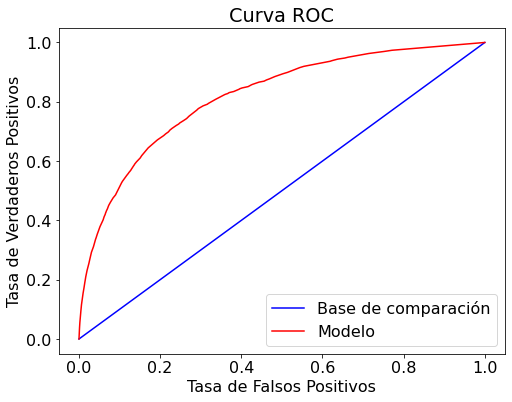

In [19]:
train_probs_random_forest_random_search_best_model = model_random_forest_random_search_best_model.predict_proba(X_train)[:, 1]
probs_random_forest_random_search_best_model = model_random_forest_random_search_best_model.predict_proba(X_val)[:, 1]
train_predictions_random_forest_random_search_best_model = model_random_forest_random_search_best_model.predict(X_train)
predictions_random_forest_random_search_best_model = model_random_forest_random_search_best_model.predict(X_val)

evaluate_model(predictions_random_forest_random_search_best_model, probs_random_forest_random_search_best_model, train_predictions_random_forest_random_search_best_model, train_probs_random_forest_random_search_best_model)

Para el accuracy, tanto en el conjunto de prueba como en el de entrenamiento, el modelo logra un rendimiento del 91%, lo que indica que es capaz de predecir correctamente el 91% de las instancias en ambos conjuntos de datos, lo cual es consistente con la línea base.

En cuanto al recall, el modelo tiene un rendimiento del 16% en el conjunto de prueba y del 15% en el de entrenamiento. Esto sugiere que el modelo es capaz de identificar correctamente el 16% (prueba) y el 15% (entrenamiento) de las instancias positivas en los datos, en comparación con el 100% de la línea base.

La precisión del modelo, tanto en prueba como en entrenamiento, es del 62%, lo que indica que el 62% de las instancias identificadas como positivas por el modelo realmente lo son. Este valor es igual al de la línea base, lo que sugiere un rendimiento consistente en este aspecto.

El F1-score del modelo es del 25% en el conjunto de prueba y del 25% en el de entrenamiento. Esta métrica combina tanto la precisión como el recall en un solo valor, lo que indica la capacidad del modelo para equilibrar ambas métricas. Sin embargo, el valor es bajo en comparación con la línea base, lo que sugiere que el modelo puede tener dificultades para encontrar un equilibrio entre la precisión y el recall.

Por último, el área bajo la curva ROC del modelo es del 82% tanto en el conjunto de prueba como en el de entrenamiento, lo que indica un buen rendimiento en la capacidad del modelo para discriminar entre las clases positiva y negativa.

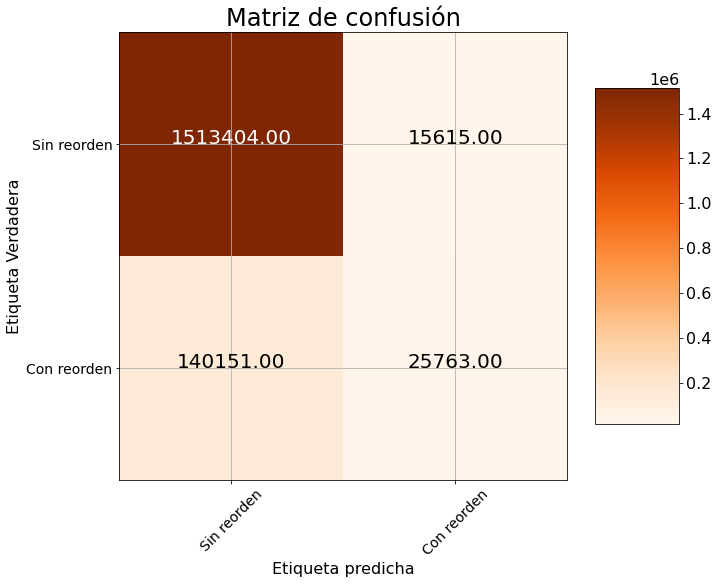

In [20]:
plot_confusion_matrix(predictions_random_forest_random_search_best_model)

En este modelo, parece haber un número considerable de falsos negativos, lo que sugiere que el modelo podría tener dificultades para identificar correctamente las instancias positivas. Hay 1,513,404 instancias que fueron clasificadas correctamente como positivas y se tienen 15,615 instancias que fueron clasificadas erróneamente como positivas. Al mismo tiempo  25,763 instancias fueron clasificadas correctamente como negativas y se tienen 140,151 instancias que fueron clasificadas erróneamente como negativas.


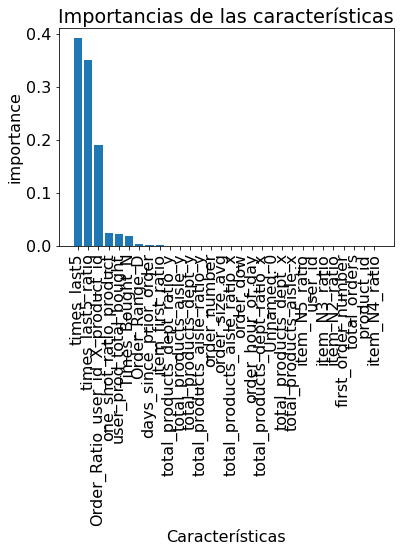

In [21]:
plot_features(model_random_forest_random_search_best_model)


Al analizar la importancia de las características en nuestro modelo, resulta alentador observar que un mayor número de variables están mostrando niveles significativos de importancia. Esto indica que el modelo está considerando una variedad más amplia de características para tomar decisiones, lo que posiblemente conduzca a una mejor capacidad para capturar la complejidad de los datos y realizar predicciones más precisas.

<h2>Gradient Boosting</h2>

Llevamos a cabo el entrenamiento de un modelo de Gradient Boosting, una técnica de aprendizaje automático que combina múltiples árboles de decisión débiles en un único modelo predictivo más robusto y preciso. A diferencia de los Random Forests, donde los árboles se construyen de forma paralela e independiente, en el Gradient Boosting, los árboles se construyen secuencialmente, y cada árbol intenta corregir los errores cometidos por los árboles anteriores.

Durante el proceso de entrenamiento del Gradient Boosting, se ajustan iterativamente los árboles de decisión para minimizar una función de pérdida, que cuantifica la discrepancia entre las predicciones del modelo y los valores reales en los datos de entrenamiento. En cada iteración, se añade un nuevo árbol al conjunto, y se ajusta de manera que se enfoque en las muestras que fueron clasificadas incorrectamente por los árboles anteriores.

Este enfoque de aprendizaje secuencial permite que el modelo se centre en las instancias más difíciles de clasificar, mejorando gradualmente su capacidad predictiva en cada iteración. Además, el Gradient Boosting es capaz de capturar relaciones complejas entre las características y la variable objetivo, lo que lo convierte en una opción poderosa para una amplia variedad de problemas de aprendizaje supervisado.

In [12]:
model_gradient_boosting = ensemble.GradientBoostingClassifier(random_state=RANDOMSEED,
                                                            n_estimators=100,
                                                            learning_rate=1.0,
                                                            max_depth=1)
model_gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=56)

'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.18 Entrenamiento: 0.18'

'Base de comparación Precision: 0.1 Prueba: 0.62 Entrenamiento: 0.62'

'Base de comparación F1_score: 0.18 Prueba: 0.27 Entrenamiento: 0.27'

'Base de comparación Roc: 0.5 Prueba: 0.82 Entrenamiento: 0.82'

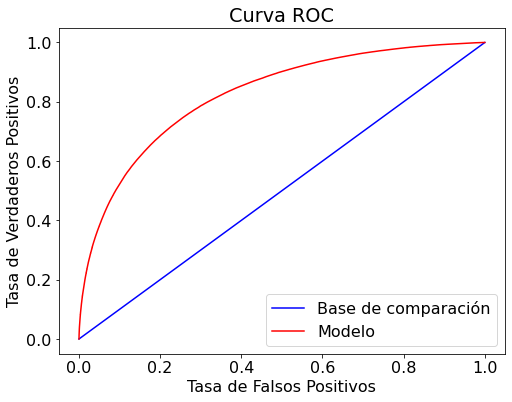

In [13]:
train_probs_gradient_boosting = model_gradient_boosting.predict_proba(X_train)[:, 1]
probs_gradient_boosting = model_gradient_boosting.predict_proba(X_val)[:, 1]
train_predictions_gradient_boosting = model_gradient_boosting.predict(X_train)
predictions_gradient_boosting = model_gradient_boosting.predict(X_val)

evaluate_model(predictions_gradient_boosting, probs_gradient_boosting, train_predictions_gradient_boosting, train_probs_gradient_boosting)

El modelo de Gradient Boosting muestra un rendimiento similar al de la línea base en términos de precisión y área bajo la curva ROC, pero tiene un rendimiento inferior en términos de recall y F1-score, lo que sugiere que puede haber margen de mejora en estas áreas específicas.

- Accuracy (Precisión): Tanto en el conjunto de prueba como en el de entrenamiento, el modelo de Gradient Boosting alcanza un rendimiento del 91%, lo cual es igual al de la línea base. Esto indica que el modelo es capaz de predecir correctamente el 91% de las instancias en ambos conjuntos de datos, lo cual es bastante alto y muestra una buena capacidad de generalización.

- Recall (Sensibilidad): En el conjunto de prueba, el modelo tiene un recall del 18%, al igual que en el conjunto de entrenamiento. Esto indica que el modelo es capaz de identificar correctamente el 18% de las instancias positivas en los datos de prueba y en los datos de entrenamiento. Sin embargo, este valor es mucho más bajo que el 100% de la línea base, lo que sugiere que el modelo podría estar perdiendo algunas instancias positivas.

- Precision (Precisión): Tanto en el conjunto de prueba como en el de entrenamiento, el modelo de Gradient Boosting logra una precisión del 62%, igual que la línea base. Esto indica que el 62% de las instancias identificadas como positivas por el modelo en el conjunto de prueba realmente lo son, al igual que en el conjunto de entrenamiento.

- F1-score: En el conjunto de prueba, el modelo tiene un F1-score del 27%, mientras que en el conjunto de entrenamiento alcanza el 27%, igual que la línea base. El F1-score es una medida que combina precisión y recall en un solo valor. El valor del 27% en el conjunto de prueba sugiere que el modelo puede tener dificultades para encontrar un equilibrio entre la precisión y el recall, similar al rendimiento de la línea base.

- ROC AUC: En el conjunto de prueba, el modelo tiene un área bajo la curva ROC del 82%, al igual que en el conjunto de entrenamiento. Este valor es consistente con el de la línea base y sugiere una buena capacidad de discriminación del modelo entre las clases positiva y negativa.

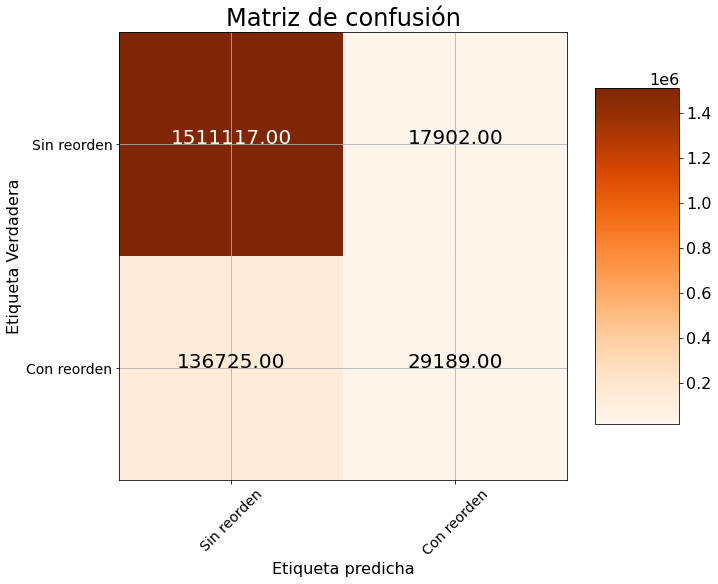

In [14]:
plot_confusion_matrix(predictions_gradient_boosting)

El modelo sigue presentando un número considerable de falsos negativos, lo que sugiere que el modelo podría tener dificultades para identificar correctamente las instancias positivas. Sin embargo presenta mejor valores de Verdaderos positivos y Verdaderos negativos que los otros modelos probados.

En este caso, hay 1,511,117 instancias que fueron clasificadas correctamente como positivas y se tienen 17,902 instancias que fueron clasificadas erróneamente como positivas.. Tambien  29,189 instancias que fueron clasificadas correctamente como negativas y 136,725 instancias que fueron clasificadas erróneamente como negativas.

La debilidad principal del modelo seencuentra en el alto numero de Falsos negativos.

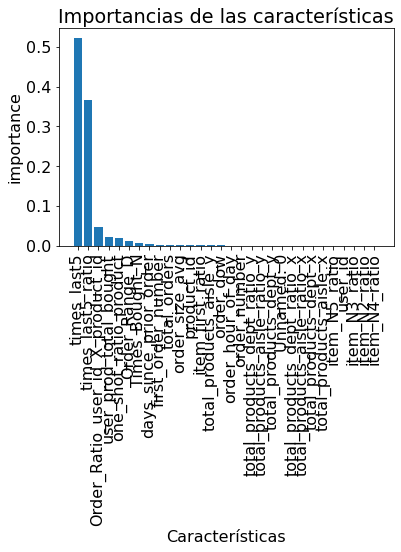

In [15]:
plot_features(model_gradient_boosting)

La reducción en el número de variables y su importancia en el modelo podría indicar varias cosas. En primer lugar, podría sugerir que algunas de las características originales no están contribuyendo de manera significativa a la capacidad predictiva del modelo. Esto podría ser el resultado de características redundantes o irrelevantes que no aportan información útil para la tarea de predicción.

Por otro lado, la reducción en la importancia de las características también podría indicar que el modelo ha simplificado su estructura para enfocarse en las características más relevantes y significativas. Esto podría ser beneficioso en términos de simplificación del modelo y reducción de la complejidad, lo que a su vez podría mejorar su capacidad de generalización y su rendimiento en datos nuevos y no vistos.

<h1>Discusión</h1>
Los resultados muestran que el modelo que mejor se ajusta es el de Bosques Aleatorios, seguido por Gradient Boosting y luego por Árbol de Decisión.

El modelo de Bosques Aleatorios tiene un rendimiento superior en términos de métricas de evaluación, con un alto valor de Acurracy (0.91) que indica una alta proporción de predicciones correctas en el conjunto de prueba. Sin embargo, muestra un bajo Recall (0.18), lo que sugiere que el modelo puede tener dificultades para identificar correctamente las instancias positivas. A pesar de esto, presenta una precisión (Precision) razonable (0.62), que indica que la mayoría de las instancias clasificadas como positivas son realmente positivas, y un F1-score de 0.28, lo que indica un buen equilibrio entre precisión y recall. Además, el área bajo la curva ROC (Roc) es bastante alta (0.81), lo que sugiere una buena capacidad de discriminación entre las clases positiva y negativa.

El modelo de Gradient Boosting muestra resultados similares, con métricas de evaluación bastante consistentes con el modelo de Bosques Aleatorios. Sin embargo, tiene un ligero aumento en el recall y un leve descenso en el F1-score en comparación con el modelo de Bosques Aleatorios. La matriz de confusión también muestra un rendimiento comparable, con una cantidad ligeramente mayor de verdaderos positivos y falsos positivos.

Por último, el modelo de Árbol de Decisión presenta un rendimiento ligeramente inferior en términos de precisión (0.63) en comparación con los otros dos modelos, aunque sus métricas de evaluación son bastante similares. La matriz de confusión muestra una cantidad ligeramente menor de verdaderos positivos y falsos positivos en comparación con los otros dos modelos.

El modelo de Bosques Aleatorios es el que mejor se ajusta a los datos y muestra el mejor rendimiento en términos de métricas de evaluación y matriz de confusión. Sin embargo, todos los modelos tienen un rendimiento bastante similar y pueden ser considerados adecuados dependiendo de los objetivos específicos del proyecto.

El modelo de Bosques Aleatorios es el que mejor se ajusta a los datos y muestra el mejor rendimiento en términos de métricas de evaluación y matriz de confusión. Sin embargo, todos los modelos tienen un rendimiento bastante similar y pueden ser considerados adecuados dependiendo de los objetivos específicos del proyecto.

<h1>Conclusión</h1>
La implementación de modelos de aprendizaje automático en Instacart ha proporcionado una visión más profunda y predictiva sobre el comportamiento de los usuarios en su plataforma de entrega de alimentos. Utilizando datos históricos de compras y avanzados algoritmos, Instacart ha podido anticipar las necesidades y preferencias de los usuarios, lo que ha mejorado significativamente la experiencia de compra.

El análisis de los modelos revela que el Bosques Aleatorios se destaca como el más eficaz en términos de métricas de evaluación, mostrando un alto Acurracy (0.91) y una precisión (Precision) razonable (0.62). Aunque tiene un bajo Recall (0.18), lo que indica dificultades para identificar correctamente las instancias positivas, el equilibrio entre precisión y recall se refleja en su F1-score de 0.28 y un área bajo la curva ROC (Roc) bastante alta (0.81). Además, la matriz de confusión revela una cantidad relativamente alta de verdaderos positivos y falsos positivos.

El modelo de Gradient Boosting muestra resultados similares al Bosques Aleatorios, con métricas de evaluación consistentes. Aunque presenta un leve aumento en el recall, tiene un F1-score ligeramente inferior y una matriz de confusión con resultados comparables.

Por otro lado, el Árbol de Decisión presenta un rendimiento ligeramente inferior en términos de precisión, aunque sus métricas de evaluación son similares. La matriz de confusión muestra resultados aceptables, aunque con una cantidad ligeramente menor de verdaderos positivos y falsos positivos en comparación con los otros dos modelos.

En conclusión, el Bosques Aleatorios es el modelo más adecuado para prever los productos que los usuarios comprarán en el futuro en Instacart, gracias a su alto Acurracy y equilibrio entre precisión y recall. Sin embargo, los otros modelos también pueden ser considerados útiles dependiendo de los objetivos específicos del proyecto. En general, la implementación de estos modelos ha mejorado significativamente la capacidad de Instacart para ofrecer una experiencia de compra personalizada y satisfactoria a sus usuarios.